# Team Black Project

The data we have used is from Our World in Data and looks at the share of new passenger vehicle registrations that are battery electric vehicles. The data can be found at https://ourworldindata.org/transport.



### Importing the data

In [1]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install geopandas
import geopandas as gpd
import scipy

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 1.1/1.1 MB 6.1 MB/s eta 0:00:00
     --------------------------------------- 21.7/21.7 MB 18.2 MB/s eta 0:00:00
     ---------------------------------------- 4.8/4.8 MB 22.2 MB/s eta 0:00:00
     ---------------------------------------- 1.4/1.4 MB 21.5 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [1]:
# import csv to google colab
# from google.colab import files
# uploaded = files.upload()

In [113]:
data = pd.read_csv('data/share-vehicle-electric (4).csv')
data.head()

,Entity,Code,Year,battery_electric_share
0,Austria,AUT,2001,0.000000
1,Austria,AUT,2002,0.000358
2,Austria,AUT,2003,0.000000
3,Austria,AUT,2004,0.000000
4,Austria,AUT,2005,0.000000


In [ ]:
#import the data
import io
data = pd.read_csv(io.BytesIO(uploaded['share-vehicle-electric.csv']))
data.head()

#data = pd.read_csv('share-vehicle-electric.csv')
#data.head()

# Summary of the data

In [4]:
# summerised information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Entity                  309 non-null    object 
 1   Code                    307 non-null    object 
 2   Year                    309 non-null    int64  
 3   battery_electric_share  309 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 9.8+ KB


In [5]:
# summary statistics of integer/float data
data.describe()

,Year,battery_electric_share
count,309.000000,309.000000
mean,2010.501618,0.873659
std,5.573956,3.626734
min,2001.000000,0.000000
25%,2006.000000,0.000290
50%,2011.000000,0.023778
75%,2015.000000,0.387658
max,2020.000000,42.383059


# Data Prep
Dropping null values for Europe

In [6]:
# calculate how many missing values
print(data.isnull().sum())

Entity                    0
Code                      2
Year                      0
battery_electric_share    0
dtype: int64


In [7]:
null_values = data[data.Code.isnull()]
null_values

,Entity,Code,Year,battery_electric_share
57,Europe,NaN,2019,2.211369
58,Europe,NaN,2020,6.212288


In [8]:

data.dropna(inplace=True)
print(data.isnull().sum())

Entity                    0
Code                      0
Year                      0
battery_electric_share    0
dtype: int64


### Visualising the data

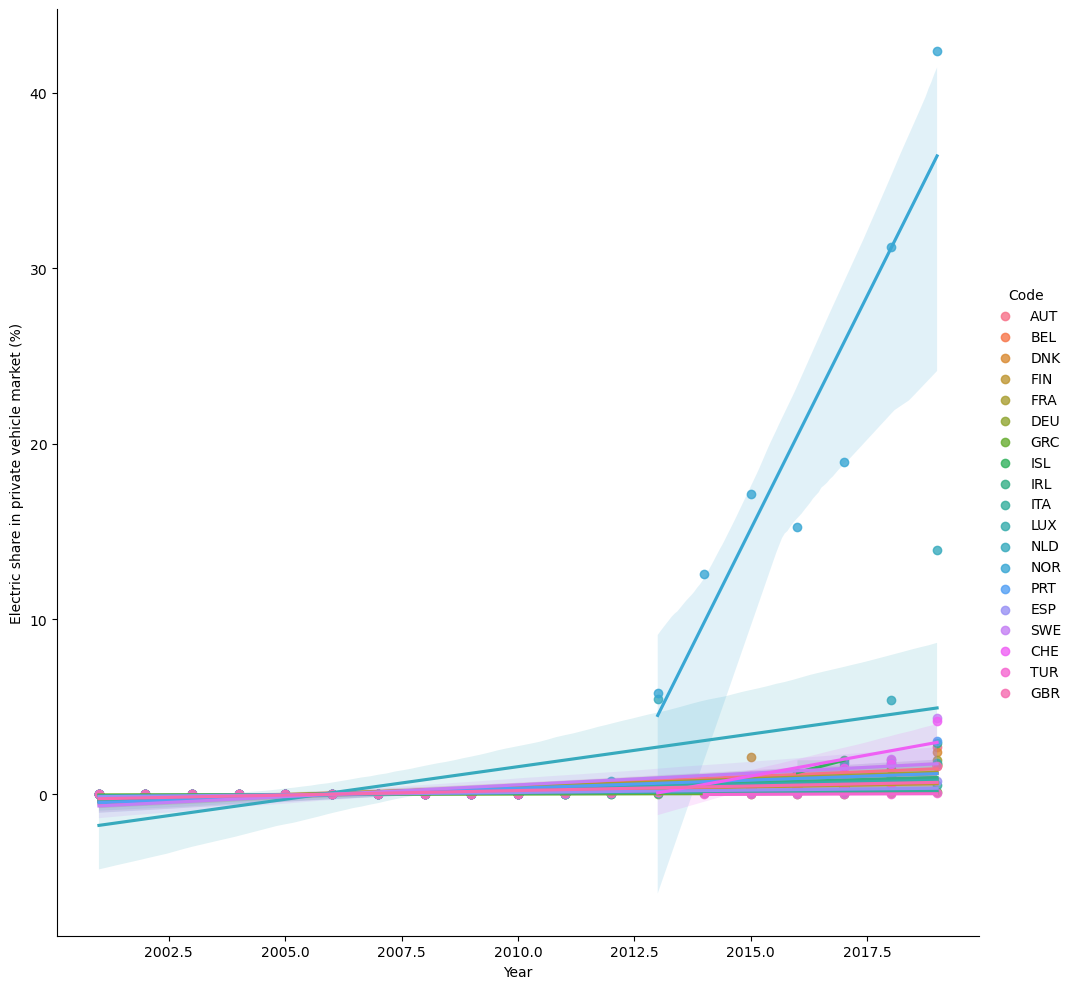

In [12]:
# plot the data
g = sns.lmplot(
    data=data,
    x="Year", y="battery_electric_share", hue="Code",
    height=10
)

g.set_axis_labels("Year", "Electric share in private vehicle market (%)")

In [13]:
mean_share = data.groupby('Year').battery_electric_share.mean()
mean_share

Year
2001    0.002670
2002    0.001603
2003    0.001014
2004    0.001830
2005    0.001750
2006    0.001069
2007    0.001297
2008    0.001454
2009    0.007472
2010    0.012039
2011    0.086408
2012    0.184212
2013    0.886629
2014    1.056311
2015    1.440816
2016    1.282073
2017    1.730872
2018    2.877609
2019    4.885053
Name: battery_electric_share, dtype: float64

<AxesSubplot:xlabel='Year', ylabel='battery_electric_share'>

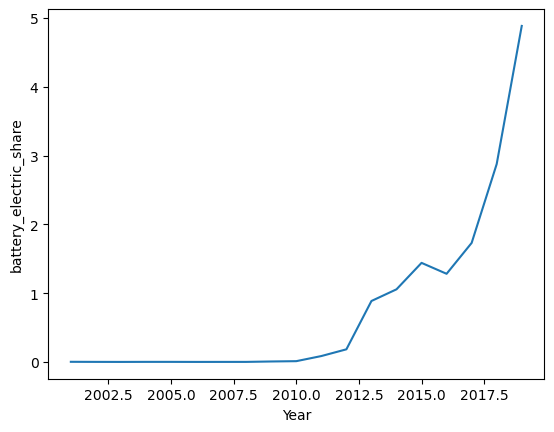

In [14]:
sns.lineplot(data = mean_share)

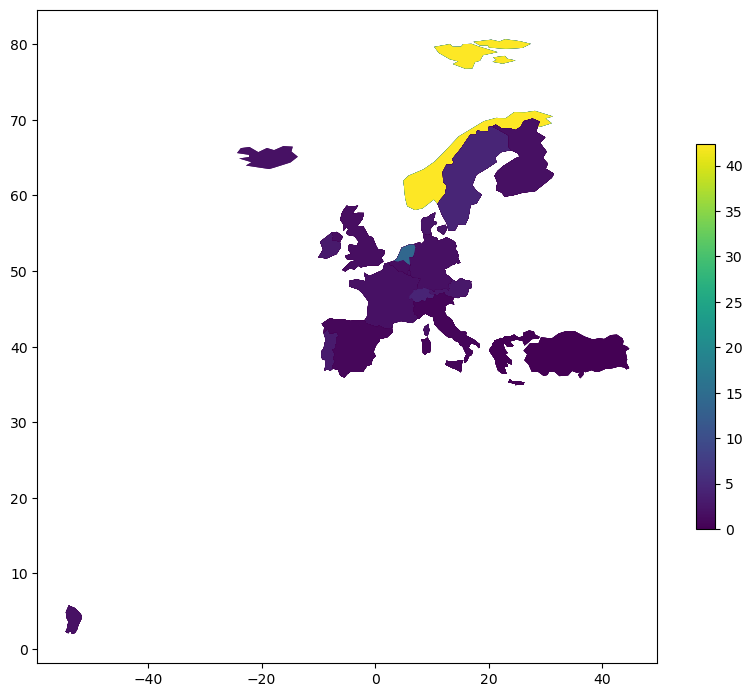

In [15]:
#create map using geopandas to visualise 2019 data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
dfc = pd.DataFrame(data)
df3 = dfc.rename({'Entity': 'name'}, axis=1)
world = pd.merge(world, df3, how='inner', on='name')
electric_car_world = world.plot(column='battery_electric_share',\
legend=True, legend_kwds={'shrink': 0.5}, figsize=(10, 10),\
missing_kwds={"color": "purple","edgecolor": "grey",
              "hatch": "///","label": "Missing values"})

## Training and Testing Data

In [16]:
data.columns

Index(['Entity', 'Code', 'Year', 'battery_electric_share'], dtype='object')

In [17]:
y = data['battery_electric_share']
X = data[['Year']]

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
# test_size always be below 0.5 to get the best results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Training the model

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lm = LinearRegression()

In [22]:
lm.fit(X_train,y_train)

LinearRegression()

In [23]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [0.19015477]


### Predicting test data

In [24]:
predictions = lm.predict( X_test)

In [25]:
data_compare = pd.DataFrame(data= {'actual values':y_test, 'predicted values': predictions})

In [26]:
data_compare['difference'] = data_compare['actual values'] - data_compare['predicted values']
data_compare

,actual values,predicted values,difference
271,0.458640,1.549623,-1.090983
8,0.012217,0.598849,-0.586632
92,0.942475,1.739777,-0.797303
121,0.000000,0.028385,-0.028385
204,0.157758,0.979158,-0.821400
...,...,...,...
87,0.008352,0.789004,-0.780652
294,0.000000,-0.161770,0.161770
31,0.154507,1.359468,-1.204961
202,0.005721,0.598849,-0.593127


Text(0, 0.5, 'Predicted Y')

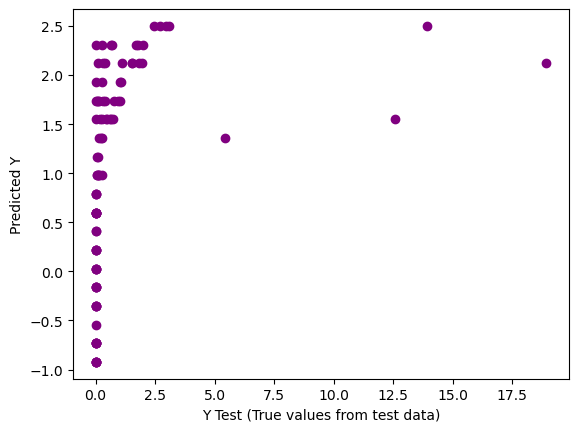

In [27]:
plt.scatter(y_test,predictions, color='purple')
plt.xlabel('Y Test (True values from test data)')
plt.ylabel('Predicted Y')

In [28]:
# https://stackoverflow.com/questions/62304927/using-linear-regression-for-yearly-distributed-time-series-data-to-get-predictio
from scipy.stats import linregress

<AxesSubplot:xlabel='Year', ylabel='battery_electric_share'>

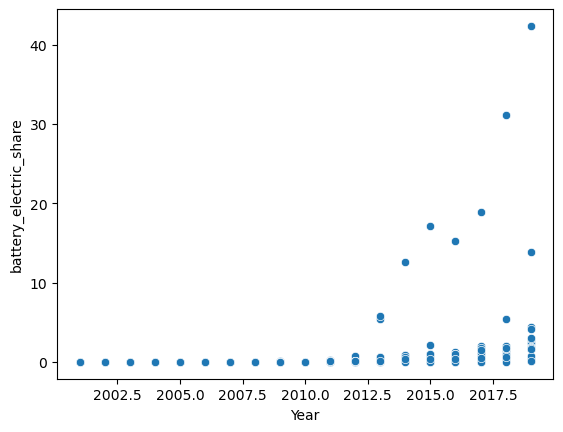

In [29]:
f, ax = plt.subplots()
sns.scatterplot(x="Year", y="battery_electric_share", ax=ax, data=data)

In [30]:
slope, intercept, r_value, p_value, std_err = linregress(data["Year"], data["battery_electric_share"])

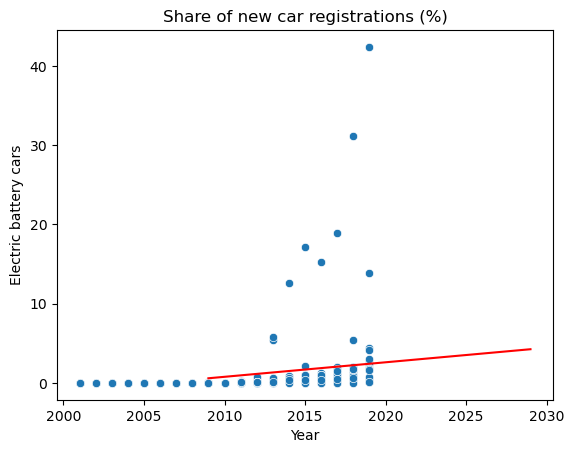

In [31]:
ax.plot(range(2009, 2030), [i*slope + intercept for i in range(2009, 2030)], color="red")
ax.set_title("Share of new car registrations (%)")
ax.set(ylabel="Electric battery cars")
f

In [32]:
# predicting the percentage in 2023
# https://stackoverflow.com/questions/24130922/how-to-print-equation-of-line-using-scipy-stats
predict_y = intercept + slope * 2023
print(predict_y)

3.151898316185452


[Text(0, 0.5, 'New electric battery car registrations (%)')]

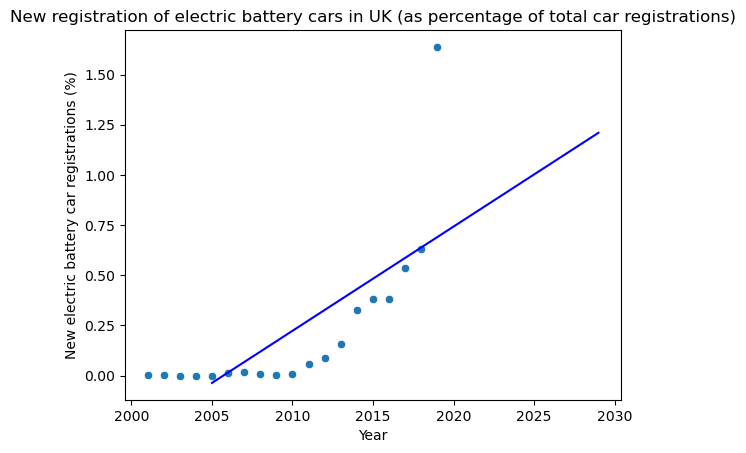

In [33]:
gbr = data[data.Code == 'GBR']

g, ax = plt.subplots()
sns.scatterplot(x="Year", y="battery_electric_share", ax=ax, data=gbr)
slope, intercept, r_value, p_value, std_err = linregress(gbr["Year"], gbr["battery_electric_share"])
ax.plot(range(2005, 2030), [i*slope + intercept for i in range(2005, 2030)], color="blue")
ax.set_title("New registration of electric battery cars in UK (as percentage of total car registrations)")
ax.set(ylabel="New electric battery car registrations (%)")


# Attempting exponential regression

In [116]:
x = np.array(gbr['Year'])
y = np.array(gbr['battery_electric_share'])
idx = np.isfinite(x) & np.isfinite(y)
ab = np.polyfit(x[idx], y[idx], 1)
#fit = np.polyfit(x1, np.log(y1), 1)
print(ab)
#polynomial is y = ax+c = linear regression
#a and c


[ 5.19186701e-02 -1.04133008e+02]


In [47]:
from scipy.optimize import curve_fit

In [48]:
year = np.array(gbr['Year'])
# year = np.isfinite(year)
percentage = np.array(gbr['battery_electric_share'])

# print year to check
print("--year--")
year

--year--


array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], dtype=int64)

In [62]:
# print percetage to check
# percentage = np.isfinite(percentage)
print("--percentage--")
# percentage
percentagetemp = percentage
percentagetemp

--percentage--


In [63]:
# 0 won't work
# to clean the data, add 0.00001 to 2004 and 2005 (100 times smaller than the smallest)
percentagetemp[3] = 0.00001
percentagetemp[4] = 0.00001

In [95]:
percentagetemp

array([1.17964200e-03, 1.75593800e-03, 7.75570000e-05, 1.00000000e-05,
       1.00000000e-05, 1.27111030e-02, 1.65167330e-02, 8.40037600e-03,
       2.76526800e-03, 8.24677500e-03, 5.68890470e-02, 8.74515810e-02,
       1.58340682e-01, 3.25750524e-01, 3.81772871e-01, 3.81612204e-01,
       5.34358386e-01, 6.31308491e-01, 1.63771991e+00])

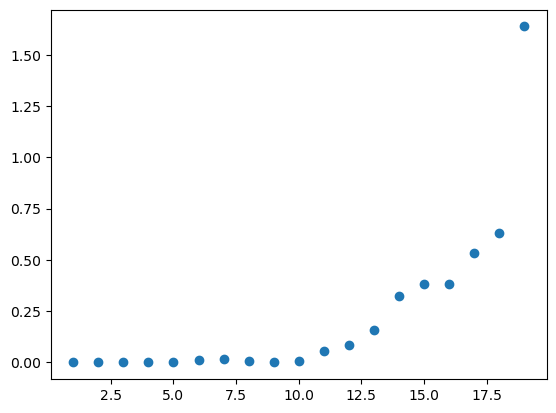

In [101]:
import matplotlib.pyplot as plt
# x = year
# 2001-2019, means one to twenty each separate in one size 
x = np.arange(1, 20, 1)
y = percentagetemp
plt.scatter(x, y)
plt.show()

In [68]:
# np.log(y)

array([ -6.74254428,  -6.34475209,  -9.46449741, -11.51292546,
       -11.51292546,  -4.36527942,  -4.10338129,  -4.77947881,
        -5.89061772,  -4.79793306,  -2.86665245,  -2.43667   ,
        -1.84300635,  -1.12162345,  -0.96292943,  -0.96335036,
        -0.62668853,  -0.45996064,   0.49330498])

In [103]:
#fit the model
fit = np.polyfit(x, np.log(y), 1)
# print
print(fit[0])
print(fit[1])

0.051918477131578954
-0.2956649244210525


In [96]:
# def expo_func(x, a, b):
#   return a * b ** x

# Define the exponential function to fit the data
def expo_func(x, a, b):
  y = 0.05192 * math.log(x) + -0.29566
  return y

In [126]:
popt, pcov = curve_fit(expo_func, year, percentage) 

In [128]:
# Predict the value of percentage for year 2020
# this x = np.arange(1, 20, 1), which means next one is 21
predicted_percentage = expo_func(21, *popt)

# Print the predicted value
print('2020:')  
predicted_percentage


2020:


1.1409423890958562e-127

In [125]:
# Predict the value of percentage for year 2020
# this x = np.arange(1, 20, 1), which means next one is 21
predicted_percentage = expo_func(31, *popt)

# Print the predicted value
print('2030:')  
predicted_percentage

2030:


3.115972726365799e-188

In [82]:
# not sure how this can implement because I use different ways for the array
percentage_pred = expo_func(year, popt[0], popt[1])
print(popt)
print(pcov)

[1. 1.]
[[inf inf]
 [inf inf]]


In [ ]:
ita = data[data.Code == 'ITA']


x_data = np.array(ita['Year']) 
y_data = np.array(ita['battery_electric_share'])

y_data

In [114]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
por = data[data.Code == 'POR']
ita = data[data.Code == 'ITA']
nor = data[data.Code == 'NOR']
# x_data = np.array(ita['Year']) 
# y_data = np.array(ita['battery_electric_share'])

def func_exp(x, a, b, c):
    c != 0
    return a * np.exp(b * x) + c

def exponential_regression (x_data, y_data):
    popt, pcov = curve_fit(func_exp, x_data, y_data, p0 = (-1,0,1))
    print(popt)
    points = plt.plot(x_data, y_data, 'x', color='xkcd:maroon', label = "data")
    regression_curve = plt.plot(x_data, func_exp(x_data, *popt), color='xkcd:teal', label = "fit: {:.3f}, {:.3f}, {:.3f}".format(*popt))
    plt.legend()
    plt.show()
    return func_exp(x_data, *popt)

x_data = np.array(por['Year']) 
y_data = np.array(por['battery_electric_share'])
idx = np.isfinite(x_data) & np.isfinite(y_data)
exponential_regression(x_data, y_data)

ValueError: `ydata` must not be empty!

### Evaluating the data

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))

print('MSE:', metrics.mean_squared_error(y_test, predictions))